# Digits Recognition Using RandomForestClassifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

model=RandomForestClassifier(n_estimators=300)
digits=load_digits()

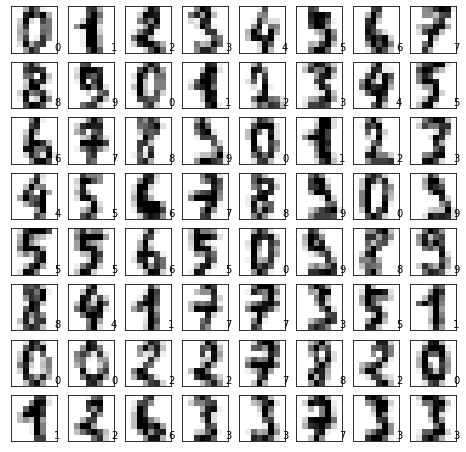

In [6]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8,8))

for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary)
    ax.text(7,7,str(digits.target[i]))
    

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target)
model.fit(x_train,y_train)

y_prd=model.predict(x_test)

In [8]:
from sklearn.metrics import confusion_matrix
c_matrix=confusion_matrix(y_test,y_prd)
print(c_matrix)


[[44  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 1  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  1  0  3  1  0]
 [ 0  0  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  1  0]
 [ 1  0  0  0  0  0 38  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  1  1  1  0  1  0  0 42  0]
 [ 0  0  0  1  0  1  0  0  2 38]]


In [9]:
from sklearn.metrics import classification_report
report=classification_report(y_prd,y_test)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       1.00      0.97      0.99        37
           2       0.98      0.98      0.98        51
           3       0.90      0.96      0.93        49
           4       1.00      1.00      1.00        44
           5       0.98      0.95      0.96        57
           6       0.95      1.00      0.97        38
           7       0.97      0.93      0.95        42
           8       0.91      0.89      0.90        47
           9       0.90      0.97      0.94        39

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



# Digits Recognition Using Neural Network

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import numpy as np

In [157]:
model=Sequential(
    [
        Dense(units=100,activation='relu'),
        Dense(units=80,activation='relu'),
        Dense(units=60,activation='relu'),
        Dense(units=40,activation='relu'),
        Dense(units=30,activation='relu'),
        Dense(units=20,activation='relu'),
        Dense(units=10,activation='linear')   
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001) 
)

In [158]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
43/43 [==============================] - 2s 4ms/step - loss: 1.8006
Epoch 2/10
43/43 [==============================] - 0s 4ms/step - loss: 0.7602
Epoch 3/10
43/43 [==============================] - 0s 4ms/step - loss: 0.3109
Epoch 4/10
43/43 [==============================] - 0s 4ms/step - loss: 0.1883
Epoch 5/10
43/43 [==============================] - 0s 4ms/step - loss: 0.0879
Epoch 6/10
43/43 [==============================] - 0s 4ms/step - loss: 0.1836
Epoch 7/10
43/43 [==============================] - 0s 4ms/step - loss: 0.0742
Epoch 8/10
43/43 [==============================] - 0s 4ms/step - loss: 0.0418
Epoch 9/10
43/43 [==============================] - 0s 4ms/step - loss: 0.0283
Epoch 10/10
43/43 [==============================] - 0s 4ms/step - loss: 0.0169


In [159]:
pred=model.predict(x_test)
pred= tf.nn.softmax(pred).numpy()

15/15 [==============================] - 0s 3ms/step


In [160]:
prediction=[]
for i in range(len(pred)):
    prediction.append(np.argmax(pred[i]))

In [161]:
c_matrix=confusion_matrix(y_test,prediction)
print(c_matrix)

[[44  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  1  0  0  0]
 [ 0  0 51  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  2  1  2  0  0]
 [ 0  0  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0 55  0  0  0  0]
 [ 0  0  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  1  0 38  0  1]
 [ 0  0  0  1  0  0  2  0 43  0]
 [ 0  0  0  2  0  2  0  0  2 36]]


In [162]:
report=classification_report(y_test,prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      0.97      0.99        36
           2       1.00      1.00      1.00        51
           3       0.94      0.90      0.92        52
           4       1.00      1.00      1.00        44
           5       0.92      1.00      0.96        55
           6       0.91      0.97      0.94        40
           7       0.95      0.95      0.95        40
           8       0.93      0.93      0.93        46
           9       0.97      0.86      0.91        42

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450

